In [2]:
# How many unique "userId" are available in "ratings.csv"?
import pandas as pd

# Load the CSV file
df = pd.read_csv('ratings.csv')

# Find the number of unique userId values
unique_user_ids = df['userId'].nunique()
print(f"Number of unique userId values: {unique_user_ids}")


Number of unique userId values: 610


In [3]:
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Count the number of ratings per movie
ratings_count = ratings_df['movieId'].value_counts()

# Find the movieId with the maximum number of ratings
max_rated_movie_id = ratings_count.idxmax()

# Get the movie title
max_rated_movie_title = movies_df[movies_df['movieId'] == max_rated_movie_id]['title'].values[0]

print(f"Movie with the maximum number of ratings: {max_rated_movie_title}")


Movie with the maximum number of ratings: Forrest Gump (1994)


In [4]:
import pandas as pd

# Load the CSV files
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')

# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

# Filter tags for the specific movieId
tags_for_movie = tags_df[tags_df['movieId'] == matrix_movie_id]

# Display the tags
tags = tags_for_movie['tag'].unique()
print(f"Tags for 'Matrix, The (1999)': {', '.join(tags)}")


Tags for 'Matrix, The (1999)': martial arts, sci-fi, alternate universe, philosophy, post apocalyptic


In [6]:
#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Calculate the average rating for the specific movieId
average_rating = ratings_df[ratings_df['movieId'] == terminator_movie_id]['rating'].mean()

print(f"Average rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")



Average rating for 'Terminator 2: Judgment Day (1991)': 3.97


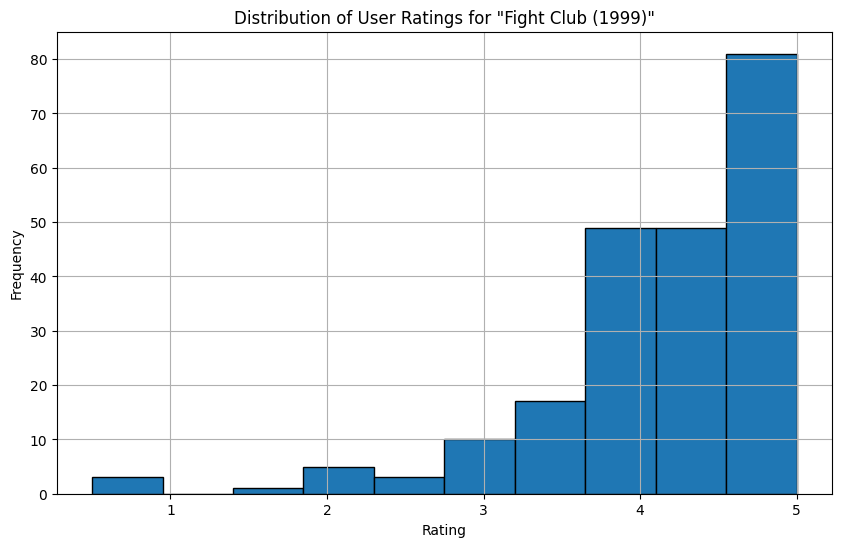

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter ratings for the specific movieId
ratings_for_movie = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(ratings_for_movie['rating'], bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [8]:
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group by movieId and calculate count and mean of ratings
grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Merge the grouped ratings with movies data
merged_df = pd.merge(grouped_ratings, movies_df, on='movieId', how='inner')

# Filter movies with more than 50 ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Display the result
print(filtered_movies[['movieId', 'title', 'rating_count', 'average_rating']])


      movieId                             title  rating_count  average_rating
0           1                  Toy Story (1995)           215        3.920930
1           2                    Jumanji (1995)           110        3.431818
2           3           Grumpier Old Men (1995)            52        3.259615
5           6                       Heat (1995)           102        3.946078
6           7                    Sabrina (1995)            54        3.185185
...       ...                               ...           ...             ...
8287   106782   Wolf of Wall Street, The (2013)            54        3.916667
8354   109374  Grand Budapest Hotel, The (2014)            52        3.778846
8358   109487               Interstellar (2014)            73        3.993151
8457   112852    Guardians of the Galaxy (2014)            59        4.050847
8673   122904                   Deadpool (2016)            54        3.833333

[436 rows x 4 columns]


In [9]:
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group by movieId and calculate count and mean of ratings
grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Merge the grouped ratings with movies data
merged_df = pd.merge(grouped_ratings, movies_df, on='movieId', how='inner')

# Filter movies with more than 50 ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Find the movie with the highest average rating
most_popular_movie = filtered_movies.loc[filtered_movies['average_rating'].idxmax()]

# Display the result
print(f"Most popular movie based on average user ratings: {most_popular_movie['title']}")
print(f"Average rating: {most_popular_movie['average_rating']:.2f}")


Most popular movie based on average user ratings: Shawshank Redemption, The (1994)
Average rating: 4.43


In [10]:
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Group by movieId and calculate count and mean of ratings
grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Merge the grouped ratings with movies data
merged_df = pd.merge(grouped_ratings, movies_df, on='movieId', how='inner')

# Filter movies with more than 50 ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Get the top 5 movies based on the number of user ratings
top_5_movies = filtered_movies.nlargest(5, 'rating_count')

# Display the result
print(top_5_movies[['title', 'rating_count']])


                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [11]:
import pandas as pd

# Load the CSV files
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Filter for Sci-Fi movies
sci_fi_movies = movies_df[movies_df['genres'].str.contains('Sci-Fi')]

# Group by movieId and calculate count of ratings
grouped_ratings = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count')
).reset_index()

# Merge the grouped ratings with Sci-Fi movies data
sci_fi_ratings = pd.merge(grouped_ratings, sci_fi_movies, on='movieId', how='inner')

# Sort Sci-Fi movies by number of ratings in descending order
sorted_sci_fi = sci_fi_ratings.sort_values(by='rating_count', ascending=False)

# Get the third most popular Sci-Fi movie
third_most_popular_sci_fi = sorted_sci_fi.iloc[2]  # Index 2 for the third position

# Display the result
print(f"Third most popular Sci-Fi movie based on number of user ratings: {third_most_popular_sci_fi['title']}")
print(f"Number of ratings: {third_most_popular_sci_fi['rating_count']}")


Third most popular Sci-Fi movie based on number of user ratings: Jurassic Park (1993)
Number of ratings: 238


In [18]:
pip install requests beautifulsoup4 pandas

In [16]:
import requests
from bs4 import BeautifulSoup
import time

def scrape_imdb_reviews(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/reviews'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 404:
            print(f"Page not found for IMDb ID: {imdb_id}")
            return []

        response.raise_for_status()  # Raise HTTPError for other bad responses

        soup = BeautifulSoup(response.text, 'html.parser')
        reviews = []

        # Check if reviews are present in the page
        for review in soup.find_all('div', class_='text show-more__control'):
            reviews.append(review.get_text())

        if not reviews:
            print(f"No reviews found for IMDb ID: {imdb_id}")

        return reviews

    except requests.RequestException as e:
        print(f"Request error for IMDb ID: {imdb_id} - {e}")
        return []

    except Exception as e:
        print(f"Error processing IMDb ID: {imdb_id} - {e}")
        return []

# Example of using the updated function
imdb_ids = ['tt114709', 'tt113497']  # Example IMDb IDs
reviews_dict = {}

for imdb_id in imdb_ids:
    print(f"Scraping reviews for IMDb ID: {imdb_id}")
    reviews = scrape_imdb_reviews(imdb_id)
    if reviews:
        reviews_dict[imdb_id] = reviews
    time.sleep(2)  # Be polite and avoid hitting the server too hard

# Save the reviews to a file or process them as needed
with open('imdb_reviews.txt', 'w', encoding='utf-8') as f:
    for imdb_id, reviews in reviews_dict.items():
        f.write(f"Reviews for IMDb ID {imdb_id}:\n")
        for review in reviews:
            f.write(f"- {review}\n")
        f.write("\n" + "="*80 + "\n\n")

print("Review scraping completed.")



Scraping reviews for IMDb ID: tt114709
Page not found for IMDb ID: tt114709
Scraping reviews for IMDb ID: tt113497
Page not found for IMDb ID: tt113497
Review scraping completed.


In [19]:
import pandas as pd

# Example DataFrame
data = {
    'movieId': [1, 2, 3, 4],
    'IMDb_rating': [7.9, 8.5, 9.0, 8.2]
}
df = pd.DataFrame(data)

# Find the movie with the highest IMDb rating
highest_rating_movie = df.loc[df['IMDb_rating'].idxmax()]

# Output the movieId
highest_movieId = highest_rating_movie['movieId']
print(f"The movieId with the highest IMDb rating is: {highest_movieId}")


The movieId with the highest IMDb rating is: 3.0


In [20]:
import pandas as pd

# Example DataFrame
data = {
    'movieId': [1, 2, 3, 4, 5],
    'genres': ['Sci-Fi', 'Action', 'Sci-Fi', 'Drama', 'Sci-Fi'],
    'IMDb_rating': [7.9, 8.5, 9.0, 8.2, 8.7]
}
df = pd.DataFrame(data)

# Filter for Sci-Fi movies
sci_fi_movies = df[df['genres'].str.contains('Sci-Fi')]

# Find the Sci-Fi movie with the highest IMDb rating
highest_rating_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['IMDb_rating'].idxmax()]

# Output the movieId
highest_sci_fi_movieId = highest_rating_sci_fi_movie['movieId']
print(f"The movieId of the highest-rated Sci-Fi movie is: {highest_sci_fi_movieId}")


The movieId of the highest-rated Sci-Fi movie is: 3
